In [2]:
# python 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# data 파일 불러오기
df = pd.read_excel('TableDynamicReport (3).xlsx')
df.describe()

,Air density,Grid active power,Nacelle outdoor temperature,Nacelle position,Turbine availability sequence status,Wind direction,Wind speed1,Wind speed2,Yaw misalignment1,Yaw misalignment2
count,2849.000000,2849.000000,2849.000000,2853.000000,2853.000000,2854.000000,2850.000000,2850.000000,2854.000000,2854.000000
mean,1.201127,1686.594506,6.319355,1.929586,15.737820,193.851822,6.848851,6.448251,-15.055431,-7.829643
std,0.018902,1603.298893,4.369271,85.274714,12.633188,130.139825,4.191352,3.620496,35.906244,31.941774
min,1.165804,-43.964000,-4.190546,-179.817000,10.000000,0.000000,0.003399,0.232492,-179.100000,-174.600000
25%,1.187470,129.525000,3.305829,-29.871871,10.000000,45.625000,3.057185,3.172395,-24.900000,-18.200000
50%,1.198861,1202.915000,6.776770,1.900000,10.000000,191.500000,6.544482,6.124680,-12.200000,-9.200000
75%,1.213892,3370.050000,9.459638,39.000000,10.000000,331.100000,10.404944,9.428433,-0.600000,0.075000
max,1.247205,4266.635000,14.646543,179.649815,90.000000,360.000000,17.336254,15.781142,173.600000,177.700000


In [4]:
# 전처리 (진북좌북 보정, 유효방위각 적용)
df = df[df["Turbine availability sequence status"] == 10]
df["Wind direction"] = df["Wind direction"] - 7.37
df["Wind direction"] = df["Wind direction"].where(df["Wind direction"] >= 0, df["Wind direction"] + 360)
df = df[((df["Wind direction"] >= 0) & (df["Wind direction"] <= 25)) | ((df["Wind direction"] >= 227) & (df["Wind direction"] <= 360))]
df = df[df["Grid active power"] > 0]
df.describe()

,Air density,Grid active power,Nacelle outdoor temperature,Nacelle position,Turbine availability sequence status,Wind direction,Wind speed1,Wind speed2,Yaw misalignment1,Yaw misalignment2
count,1594.000000,1594.000000,1591.000000,1594.000000,1594.0,1594.000000,1591.000000,1591.000000,1594.000000,1594.000000
mean,1.211016,2167.457253,4.011008,-6.408502,10.0,252.499573,8.274521,7.618795,-13.325784,-9.885634
std,0.016931,1566.194188,3.855710,35.433753,0.0,134.806782,3.826085,3.336157,17.962992,12.298002
min,1.173407,3.873000,-4.190546,-161.494175,10.0,0.130000,1.023142,1.367520,-118.400000,-67.200000
25%,1.198936,624.199500,2.073402,-21.175006,10.0,241.655000,5.079093,4.797219,-23.300000,-17.300000
50%,1.210085,1943.911500,4.193094,-3.399994,10.0,323.730000,8.008370,7.294696,-12.700000,-9.800000
75%,1.219252,3977.905500,6.748306,15.900001,10.0,341.330000,11.238073,10.169976,-2.500000,-2.325000
max,1.247205,4266.635000,12.879776,169.038174,10.0,359.930000,17.336254,15.781142,95.100000,39.100000


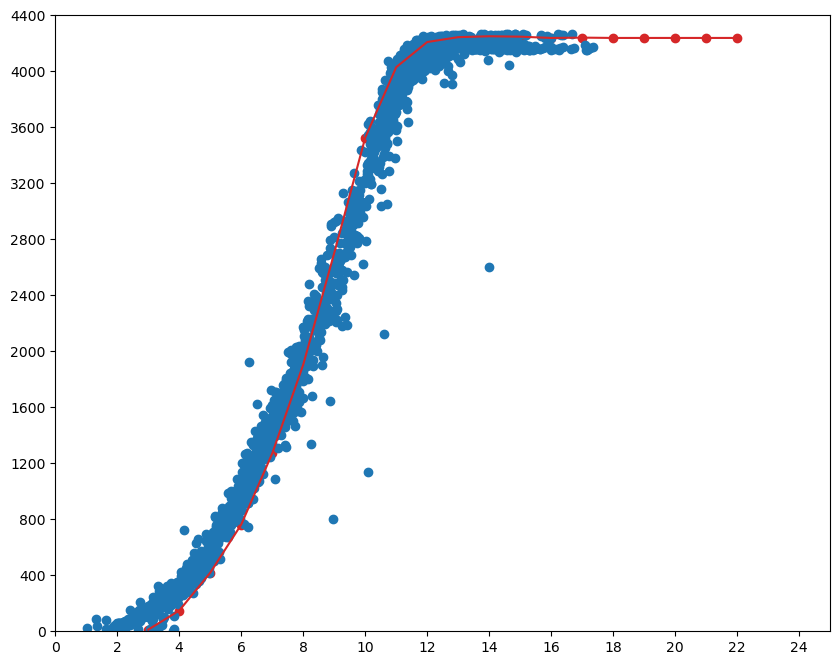

In [5]:
# 출력곡선 비교
WS = np.arange(3,23,1)
Power = (11.7, 147.5, 418.1, 762.3, 1270.1, 1904.6, 2701.7, 3525.6, 4029.3, 4208.9, 4243.8, 4250.1, 4247.2, 4238.0, 4240.4, 4238.1, 4238.1, 4238.1, 4238.1, 4238.1)
plt.figure(figsize = (10, 8))
plt.plot(WS, Power, color = 'tab:red')
plt.scatter(WS, Power, color = 'tab:red')
plt.scatter(df["Wind speed1"], df["Grid active power"], color = 'tab:blue')
plt.xlim(0,25)
plt.xticks(np.arange(0,25,2))
plt.ylim(0,4400)
plt.yticks(np.arange(0,4800,400))
plt.show()

In [7]:
WS = np.arange(3, 22.5, 0.5)
data = []

for i in WS:
    bin_data = df[((df["Wind speed1"] >= (i - 0.25)) & (df["Wind speed1"] < (i + 0.25)))]
    bin_ws1 = round(bin_data["Wind speed1"].mean(), 3)
    bin_count = bin_data["Wind speed1"].count()
    data.append([i, bin_ws1, bin_count])

columns = ['WS', 'Bin_WS1', 'Bin_Count']
result_df = pd.DataFrame(data, columns=columns)
print(result_df)


      WS  Bin_WS1  Bin_Count
0    3.0    3.032         69
1    3.5    3.508         71
2    4.0    4.017         68
3    4.5    4.496         64
4    5.0    5.012         41
5    5.5    5.531         58
6    6.0    6.046         78
7    6.5    6.492         68
8    7.0    7.008         76
9    7.5    7.517         62
10   8.0    7.981         74
11   8.5    8.489         62
12   9.0    9.017         52
13   9.5    9.519         54
14  10.0   10.021         50
15  10.5   10.541         60
16  11.0   10.986         85
17  11.5   11.509         63
18  12.0   11.991         57
19  12.5   12.487         50
20  13.0   13.023         35
21  13.5   13.545         36
22  14.0   13.996         38
23  14.5   14.476         39
24  15.0   15.000         36
25  15.5   15.477         17
26  16.0   16.005         12
27  16.5   16.487          7
28  17.0   17.138          5
29  17.5   17.294          2
30  18.0      NaN          0
31  18.5      NaN          0
32  19.0      NaN          0
33  19.5      